#Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from sklearn.linear_model import LogisticRegression

#Loading ResNet Model


In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in resnet_model.layers:
  layer.trainable = False

#Defining Custom Model

In [ ]:
def get_model(resnet_model):
  x = resnet_model.output
  x = Dense(1024, activation = 'relu')(x)
  x = GlobalAveragePooling2D()(x)
  x = Dense(1,  activation = 'sigmoid')(x)
  model = Model(inputs=resnet_model.input, outputs=x)
  return model

# image(input) -> padding ->  convolution -> pooling -> output

In [ ]:
model = get_model(resnet_model)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(0.001), metrics=['accuracy'], loss='binary_crossentropy')

#  accuracy - up
#  loss - down

#Loading and Splitting the Dataset

In [ ]:
train_df, test_df = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset',
    image_size = (244, 244),
    validation_split = 0.2,
    subset = 'both',
    seed = 42
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Using 50 files for validation.


#Visualizing the Dataset


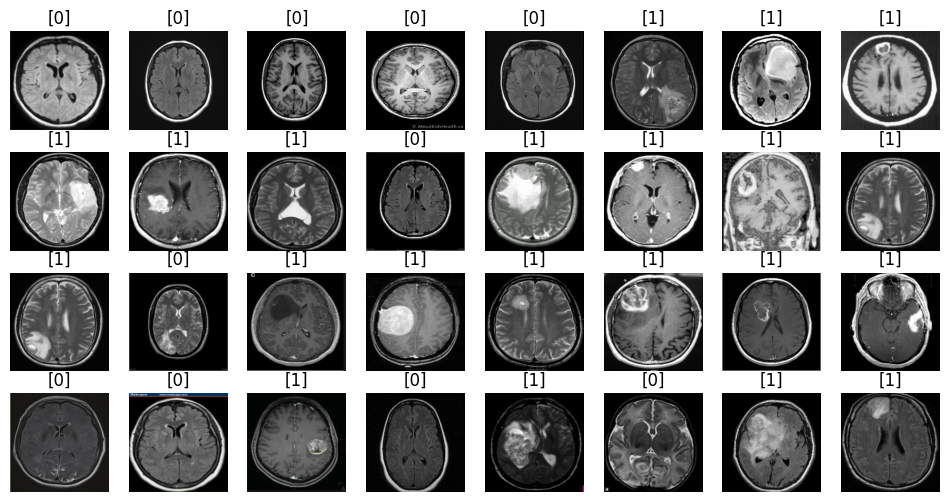

In [ ]:
import matplotlib.pyplot as plt
for images, labels in train_df.take(1):
    # Display the images
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(str([labels[i].numpy()]))

# Batch Dimensions from the dataset

In [ ]:
m = LogisticRegression()

In [ ]:
batch = train_df.take(2)

for x,  y in batch:
  print(x.numpy().shape)
  print(y.numpy().shape)

(32, 244, 244, 3)
(32,)
(32, 244, 244, 3)
(32,)


#Training the Model

In [ ]:
history = model.fit(train_df, epochs=5, validation_data = test_df)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 115s 15s/step - accuracy: 0.5964 - loss: 1.7317 - val_accuracy: 0.7800 - val_loss: 0.7905
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 124s 13s/step - accuracy: 0.8961 - loss: 0.2694 - val_accuracy: 0.8600 - val_loss: 0.3159
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 13s/step - accuracy: 0.9557 - loss: 0.1741 - val_accuracy: 0.8800 - val_loss: 0.3364
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - accuracy: 0.9478 - loss: 0.1564 - val_accuracy: 0.8800 - val_loss: 0.2740
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 96s 14s/step - accuracy: 0.9500 - loss: 0.1105 - val_accuracy: 0.8400 - val_loss: 0.3136


#Visualizing the Model Accuracy and Loss

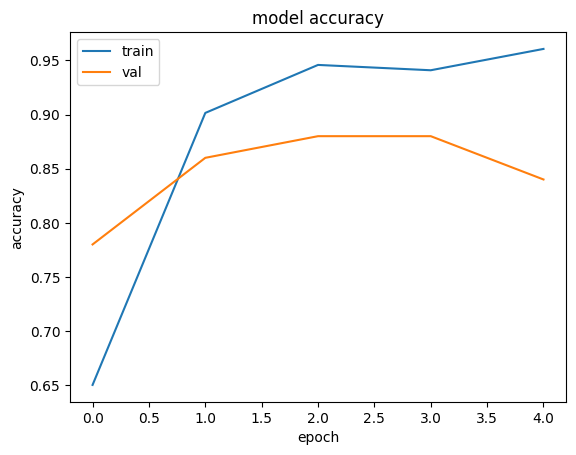

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

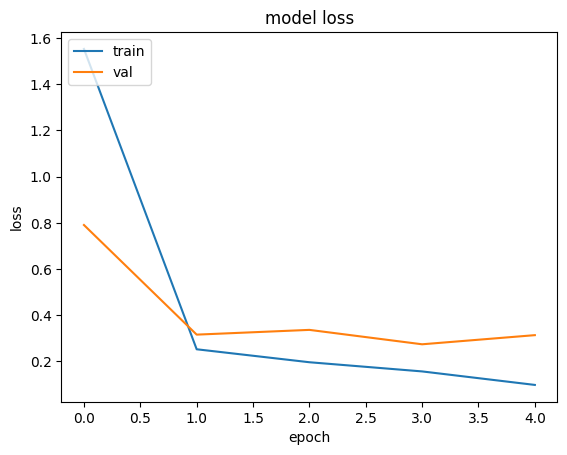

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Preprocessing Images for Prediction

In [ ]:
img = keras.utils.load_img(
    '/content/drive/MyDrive/brain_tumor_dataset/no/20 no.jpg',
    target_size = (244, 244) #244 x 244, 1920X1080  -> 244 x 244
)
img2 = keras.utils.load_img(
    '/content/drive/MyDrive/brain_tumor_dataset/yes/Y10.jpg',
    target_size = (244, 244)
)

In [ ]:
arr1 = keras.utils.img_to_array(img)
arr2 = keras.utils.img_to_array(img2)

arr1 = np.array([arr1])
arr2 = np.array([arr2])

test_input = np.vstack([arr1, arr2])
test_input.shape

(2, 244, 244, 3)

In [ ]:
predictions = model.predict(test_input)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.19994327],
       [0.98199624]], dtype=float32)

#Checking the Prediction

In [21]:
for i, prediction in enumerate(predictions):
    label = "Brain Tumor" if prediction[0] > 0.5 else "No Brain Tumor"
    print(f"Image {i+1}: {label} (Probability: {prediction[0]:.2f})")


Image 1: No Brain Tumor (Probability: 0.20)
Image 2: Brain Tumor (Probability: 0.98)
